In [22]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
# Display the data table for preview

pyber_data = pd.merge(city_data, ride_data, on="city")
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [23]:
# Obtain the x and y coordinates for each of the three city types

urban = pyber_data[pyber_data["type"] == "Urban"].groupby([pyber_data["city"]])
rural = pyber_data[pyber_data["type"] == "Rural"].groupby([pyber_data["city"]])
suburb = pyber_data[pyber_data["type"] == "Suburban"].groupby([pyber_data["city"]])

In [24]:
#axis for urban

x_urban = urban['ride_id'].count()
y_urban = urban['fare'].mean()
s_urban = urban['driver_count'].mean()

In [25]:
#axsis for rural

x_rural = rural['ride_id'].count()
y_rural = rural['fare'].mean()
s_rural = rural['driver_count'].mean()

In [26]:
#axsis for suburban

x_suburb = suburb['ride_id'].count()
y_suburb = suburb['fare'].mean()
s_suburb = suburb['driver_count'].mean()

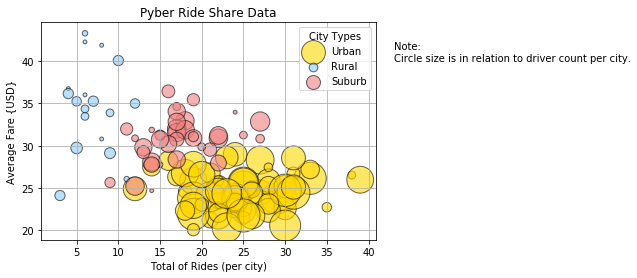

In [27]:
# Build the scatter plots for each city types

plt.scatter(x_urban, y_urban, label= 'Urban', s= s_urban * 15, color= 'gold', edgecolor = 'black', alpha = .6, marker = 'o')
plt.scatter(x_rural, y_rural, label= 'Rural', s= s_rural *15, color = 'lightskyblue', edgecolor = 'black', alpha=.6, marker = 'o')
plt.scatter(x_suburb, y_suburb, label = 'Suburb', s= s_suburb *15, color = 'lightcoral', edgecolor = 'black', alpha=.6, marker = 'o')
plt.grid()

# Incorporate the other graph properties

plt.xlabel('Total of Rides (per city)')
plt.ylabel('Average Fare {USD}')
plt.title('Pyber Ride Share Data')

# Create a legend

legend = plt.legend(fontsize =10, title= 'City Types', loc = 'best')

#merge up

# Incorporate a text label regarding circle size

plt.text(43, 40,"Note: \nCircle size is in relation to driver count per city.", fontsize = 10)

# Save Figure

plt.savefig("scatter.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

In [28]:
# Calculate Type Percents

type_group= pyber_data.groupby(['type'])
fare_total = type_group['fare'].sum()

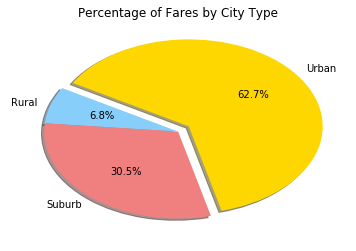

In [29]:
# Build Pie Chart

labels = ['Rural', 'Suburb', 'Urban']
explode = (0, 0, 0.1)
colors = ['lightskyblue', 'lightcoral', 'gold']
plt.pie(fare_total, explode=explode, labels=labels, colors=colors, 
         autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('Percentage of Fares by City Type')

# Save Figure ( figure this out later)

plt.savefig("FarePyPie.png", bbox_inches="tight")

## Total Rides by City Type

In [30]:
# Calculate Ride Percents


rides_total_by_type = pyber_data['type'].value_counts()
#rides_total_by_type


In [31]:
pyber_data['type'].value_counts('Urban')

Urban       0.684211
Suburban    0.263158
Rural       0.052632
Name: type, dtype: float64

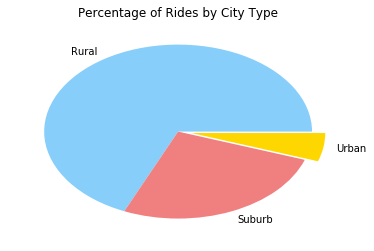

In [32]:
# Build Pie Chart

labels = ['Rural', 'Suburb', 'Urban']
explode = (0, 0, 0.1)
colors = ['lightskyblue', 'lightcoral', 'gold']
plt.pie(rides_total_by_type, explode=explode, labels=labels, colors=colors) 
        #autopct="%1.1f%%") 
        #shadow=True)
plt.title('Percentage of Rides by City Type')

# Save Figure

plt.savefig("RidePyPie.png", bbox_inches="tight")

## Total Drivers by City Type

In [33]:
# Calculate Driver Percents

driver_group = city_data.groupby(['type'])
driver_total = driver_group['driver_count'].sum()

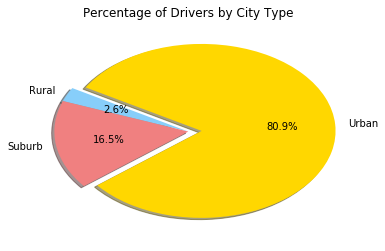

In [34]:
# Build Pie Charts
labels = ['Rural', 'Suburb', 'Urban']
explode = (0, 0, 0.1)
colors = ['lightskyblue', 'lightcoral', 'gold']
plt.pie(driver_total, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('Percentage of Drivers by City Type')

# Save Figure

plt.savefig("CityPyPie.png", bbox_inches="tight")